In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Case study - zbiór `Boston House Dataset`

## Model prostej regresji liniowej
1. Podziel dane na część treningową i na część testową w stosunku 7:3.


2. Interesuje nas zależność wielkości ceny domu od średniej liczby pokoi w domu (zmienne `MEDV` i `RM`). Określ zmienną zależną i niezależną, a następnie:

      a) Narysuj wykres rozproszenia tych zmiennych. 
      
      b) Czy zmienne te są zależne? 
      
      c) Oblicz dla nich współczynnik korelacji Pearsona. 


3. Wyznacz funkcję regresji wielkości ceny domu względem średniej liczby pokoi. Narysuj ją na wykresie rozproszenia.


4. Zweryfikuj dopasowanie modelu:

    a) Czy istnieje związek pomiędzy zmienną zależną a niezależną?
    
    b) Czy wyraz wolny jest istotny w modelu?
    
    c) Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.
    
    d) Sprawdź, czy spełnione jest założenie o rozkładzie normalnym reszt.
    
    e) Zweryfikuj dopasowanie modelu, sporządź wykresy diagnostyczne: wykres wartości przewidywanych względem prawdziwych, wykres residuów względem wartości dopasowanych.
    
    f) Wyznacz i porównaj jakość dopasowania i predykcji za pomocą różnych miar (np. MSE, MAE, $R^2$).

## Model wielorakiej regresji liniowej

5. Wyznacz model liniowy najlepiej opisujący zależność zależność wielkości ceny domu od pozostałych dostępnych zmiennych:

    a) Czy istnieje związek pomiędzy zmienną zależną a którąkolwiek ze zmiennych niezależnych?
    
    b) Dla których zmiennych niezależnych Xj, j=1,...,10 można odrzucić hipotezę zerową  H0: βj = 0?
    
    c) Biorąc pod uwagę odpowiedź na poprzednie pytanie, wyznacz mniejszy model w oparciu tylko o zmienne, które faktycznie mają istotny wpływ na wielkość sprzedaży.
    
    d) Porównaj dopasowanie obu modeli (większego i mniejszego), sporządź wykresy diagnostyczne.
    
    e) Wyznacz i porównaj jakość dopasowania i predykcji dla modelu mniejszego i większego.

## Regularyzacja

6. Zastosuj regularyzację

    a) grzbietową
    
    b) Lasso


## Model regresji wielomianowej

7. Dopasuj model regresji wielomianowej:
        
    a) Znajdź optymalny stopień wielomianu.
    
    b) Zweryfikuj dopasowanie modelu, sporządź wykresy diagnostyczne.
    
    c) Zastosuj regularyzację znajdując najlepszy parametr $\alpha$.

## Podsumowanie

8. Dokonaj porównania dopasowanych powyżej modeli regresji pod względem błędu dopasowania i błędu predykcji (dane końcowe przedstaw za pomocą tabeli). 
    
**Pamiętaj o graficznej ewaluacji modeli regresji!!!**

In [3]:
boston = pd.read_csv("boston.csv")

In [5]:
#https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html opis kolumn

In [4]:
X, y = boston.iloc[:, boston.columns != 'MEDV'], boston['MEDV']

#Model prostej regresji liniowej

In [6]:
#1 podział zbioru na część treningową i testową
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

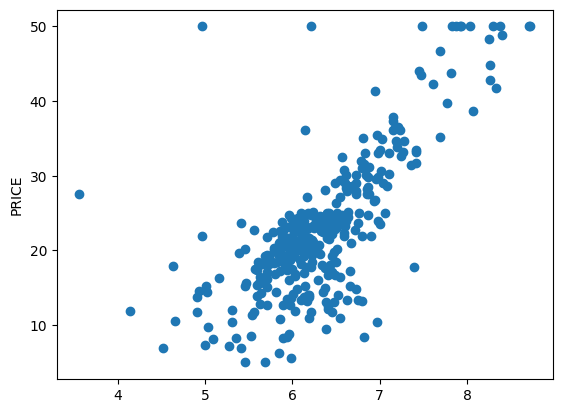

0.7442292975830678

In [15]:
#2 określenie zmiennej zależnej i niezależnej, wykres rozproszenia, określenie czy są liniowo zależne, wspołczynnik korelacji pearsona
#PRICE - zm. zależna
#RM - zm .niezależna
y_small = y_train
x_small = X_train.RM
plt.scatter(x_small, y_small)
plt.ylabel('PRICE')
plt.show()
np.corrcoef(x_small, y_small)[0,1]
#zmienne są zależne liniowo

[9.74062315]
-38.74191599333736


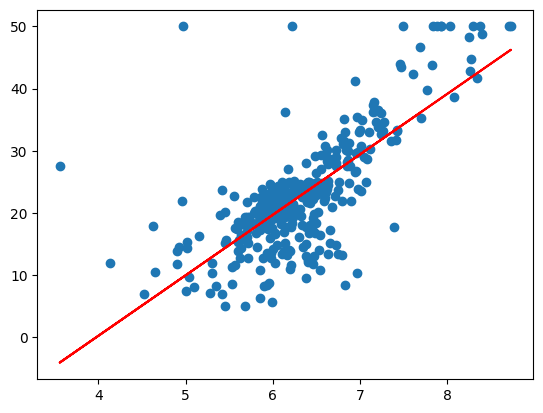

In [16]:
#3 model regresji liniowej, narysowanie prostej MNK na wykresie rozproszenia 
#za pomocą scikita
x_train = X_train['RM']
x_train_data = np.array(x_train).reshape(-1,1)
x_test = X_test['RM']
x_test_data = np.array(x_test).reshape(-1,1)
plt.scatter(x_train,y_train)
lm1 = LinearRegression()
lm1.fit(X = x_train_data, y = y_train)
print(lm1.coef_)
print(lm1.intercept_)
plt.plot(x_train,lm1.predict(x_train_data),color = 'red')

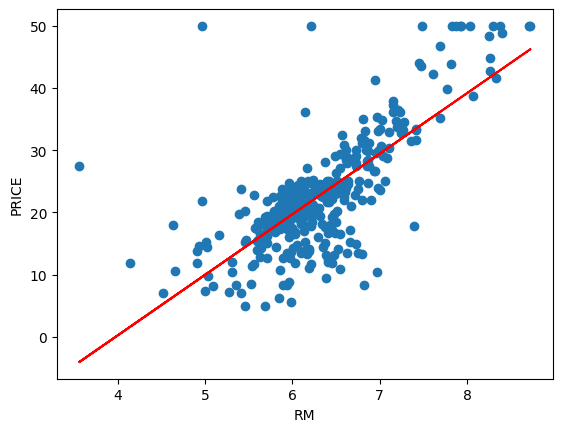

In [17]:
#za pomocą statmodelsa
x_with_const = sm.add_constant(x_train, prepend=True, has_constant='skip')
x_test_with_const =  sm.add_constant(x_test, prepend=True, has_constant='skip')

model = sm.OLS(endog=y_train, exog=x_with_const)
fitted_model = model.fit()
plt.scatter(x_train,y_train)
plt.plot(x_train, fitted_model.fittedvalues, color='red')
plt.xlabel("RM")
plt.ylabel('PRICE')
plt.show()

In [18]:
#4 a)
# Badamy zwiazek PRICE = b0 + b1 * RM

# a) Czy istnieje związek pomiędzy zmienną zależną a niezależną?
# H0: b1 = 0
# H1: b1 != 0
fitted_model.pvalues
print("p-value dla testu t dla zmiennej RM: {}".format(fitted_model.pvalues['RM'] ))
if fitted_model.pvalues['RM'] < 0.05:
    print("Wniosek: istnieje związek pomiędzy zmienną zależną a niezależną")
else:
    print("Wniosek: nie istnieje związek pomiędzy zmienną zależną a niezależną")

p-value dla testu t dla zmiennej RM: 1.1472037888009929e-63
Wniosek: istnieje związek pomiędzy zmienną zależną a niezależną


In [19]:
# b) Czy wyraz wolny jest istotny w modelu?
# H0: b0 = 0
# H1: b0 != 0

print("p-value dla testu t dla wyrazu wolnego: {}".format(fitted_model.pvalues['const'] ))
if fitted_model.pvalues['RM'] < 0.05:
    print("Wniosek: wyraz wolny jest istotny w modelu")
else:
    print("Wniosek: wyraz wolny nie jest istotny w modelu")

p-value dla testu t dla wyrazu wolnego: 3.6864029703744246e-32
Wniosek: wyraz wolny jest istotny w modelu


In [20]:
# c) Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.
print("R2: {}".format(fitted_model.rsquared)) 
# wartość współczynnika determinacji nie jest wystarczająca aby uznać model 
# za wystarczący do wyjaśniania zmiennej PRICE

R2: 0.5538772473809862


In [21]:
# d) Sprawdź, czy spełnione jest założenie o rozkładzie normalnym reszt.
print("p-value testu Omnimbus: {}".format(stats.normaltest(fitted_model.resid).pvalue))
print("p-value testu JB: {}".format(stats.jarque_bera(fitted_model.resid)[1]))
# brak spełnionego załozenia o normalności reszt na podstawie testów statystycznych

p-value testu Omnimbus: 1.5904206606110176e-24
p-value testu JB: 4.238050583684061e-200


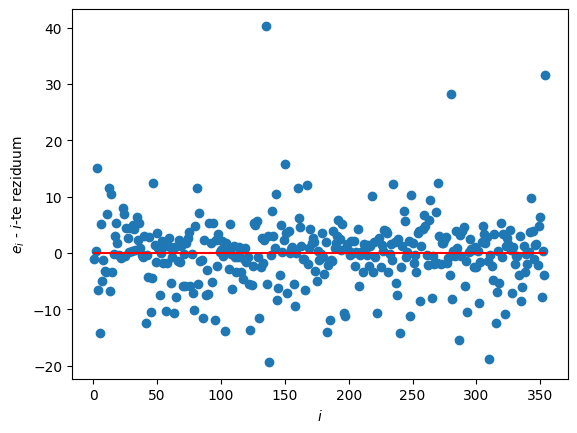

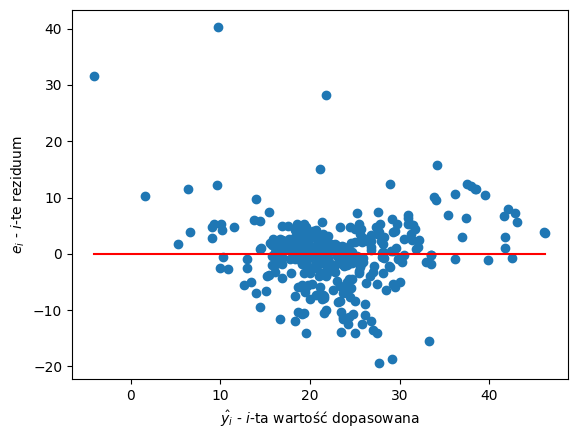

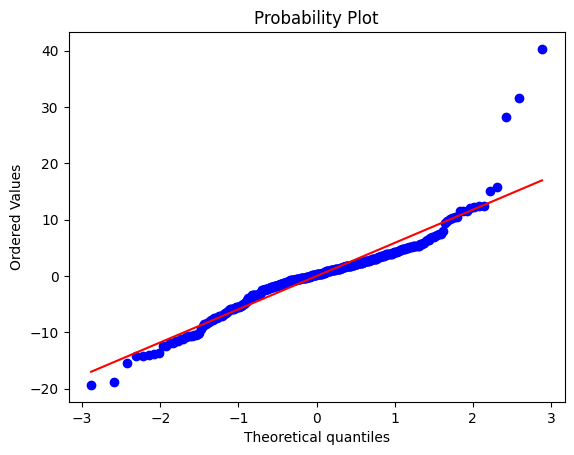

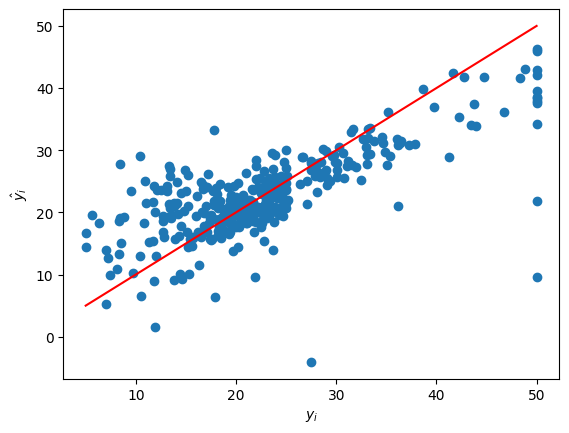

In [22]:
# e) Zweryfikuj dopasowanie modelu, sporządź wykresy diagnostyczne: 
# wykres wartości przewidywanych względem prawdziwych, wykres residuów względem wartości dopasowanych.

# 1. wykresy rezyduów (i,e_i)
xrange = np.arange(1, len(fitted_model.resid) + 1)
plt.scatter(xrange, fitted_model.resid)
plt.xlabel("$i$")
plt.ylabel("$e_i$ - $i$-te reziduum")
X_plot = np.linspace(0, 6, 6)
plt.plot(xrange, np.repeat(0, len(xrange)), color='red')

plt.show()

# 2. wykresy rezyduów (\hat(y_i),e_i)

plt.scatter(fitted_model.fittedvalues, fitted_model.resid)
plt.xlabel("$\hat{y_i}$ - $i$-ta wartość dopasowana")
plt.ylabel("$e_i$ - $i$-te reziduum")

xrange = np.arange(fitted_model.fittedvalues.min(), fitted_model.fittedvalues.max(), 0.1)
plt.plot(xrange, np.repeat(0, len(xrange)), color='red')

plt.show()
#obydwa wykresy ukłazają wartości rezyduum koło 0, jest ok z dokładnością do kilku obserwacji
# może będzie potrzebna regresja wielomianowa stopnia dwa, bo widać, że rezydua mogą się układać w łuk na wykresie 2.

# 3. Wykres kwantylowy

import scipy as sp
fig = plt.figure()
ax = fig.add_subplot(111)
sp.stats.probplot(fitted_model.resid,plot=ax, fit=True)
plt.show()

#nie ma normalności

#4. wykres wartości przewidywanych względem prawdziwych (y_i, \hat{y}_i)

xrange = np.linspace(y_train.min(), y_train.max(), 100)
plt.scatter(y_train, fitted_model.fittedvalues)
plt.plot(xrange, xrange, color='red')
plt.xlabel("$y_i$")
plt.ylabel("$\hat{y}_i$")
plt.show()

# wniosek: wykres pokazuje, że przewidywania nie układają się wzdłuż linii y=x, brak dobrego dopasowania modelu

In [23]:
#f Wyznacz i porównaj jakość dopasowania i predykcji za pomocą różnych miar (np. MSE, MAE, $R^2$).
# funkcja do liczenia miar jakości dopasowania i predykcji 
def compute_metrics_statsmodels(model, y_train, x_test, y_test):
    # Jakość dopasowania
    r2 = model.rsquared
    mse_train = metrics.mean_squared_error(y_train, model.fittedvalues)
    mae_train = metrics.median_absolute_error(y_train, model.fittedvalues)

    # Jakość predykcji
    y_pred = model.predict(x_test)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    mae_test = metrics.median_absolute_error(y_test, y_pred)
    
    return {
        'r2': r2, 'mse_train': mse_train, 'mae_train': mae_train, 'mse_test': mse_test, 'mae_test': mae_test
    }

In [24]:
# Wyznaczamy miary jakości dopasowania i predykcji
results = pd.DataFrame(index=['r2', 'mse_train', 'mae_train', 'mse_test', 'mae_test'])
results['lm(PRICE~RM)'] = compute_metrics_statsmodels(fitted_model, y_train, x_test_with_const, y_test).values()
results

,lm(PRICE~RM)
r2,0.553877
mse_train,38.271529
mae_train,2.673882
mse_test,56.691637
mae_test,3.295596


## Model wielorakiej regresji liniowej

In [25]:
#5 Dopasowujemy model regresji wielorakiej 
X_train_with_const = sm.add_constant(X_train, prepend=True, has_constant='skip')
X_test_with_const =  sm.add_constant(X_test, prepend=True, has_constant='skip')

model_full = sm.OLS(endog=y_train, exog=X_train_with_const)
fitted_model_full = model_full.fit()
fitted_model_full.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     85.00
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           2.44e-98
Time:                        21:40:19   Log-Likelihood:                -1034.2
No. Observations:                 354   AIC:                             2096.
Df Residuals:                     340   BIC:                             2151.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.9813      6.043      4.796      0.000      17.094      40.868
CRIM          -0.1010      0.035     -2.909      0.004      -0.169      -0.033
ZN             0.0400      0.016      2.551      0.011       0.009       0.071
INDUS          0.0754      0.072      1.045      0.297      -0.067       0.217
CHAS           0.2646      1.063      0.249      0.804      -1.826       2.355
NOX          -14.3409      4.595     -3.121      0.002     -23.380      -5.302
RM             4.8332      0.485      9.971      0.000       3.880       5.787
AGE           -0.0074      0.015     -0.488      0.626      -0.037       0.023
DIS           -1.3267      0.226     -5.879      0.000      -1.771      -0.883
RAD            0.2735      0.075      3.660      0.000       0.126       0.420
TAX           -0.0130      0.004     -3.059      0.002      -0.021      -0.005
PTRATIO       -0.9566      0.150     -6.372      0.000      -1.252      -0.661
B              0.0064      0.003      1.965      0.050   -7.31e-06       0.013
LSTAT         -0.4866      0.061     -8.032      0.000      -0.606      -0.367
==============================================================================
Omnibus:                      164.467   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1012.790
Skew:                           1.865   Prob(JB):                    1.19e-220
Kurtosis:                      10.399   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Badamy związek PRICE = b0 + b1*CRIM + b2*ZN + ... + b13 * LSTAT

# a) Czy istnieje związek pomiędzy zmienną zależną a którąkolwiek ze zmiennych niezależnych?
# Test F
# H0: b1 = b2 = ... = b13 = 0 (zadna zmienna w modelu nie jest istotna)
# H1: ~H1 (istnieje zmienna w modelu, która jest istotna)

print("p-value testu F: {}".format(fitted_model_full.f_pvalue))
if fitted_model_full.f_pvalue < 0.05:
    print("Wniosek: istnieje zmienna w modelu, która jest istotna")
else:
    print("Wniosek: żadna zmienna w modelu nie jest istotna")

p-value testu F: 2.4421048253055118e-98
Wniosek: istnieje zmienna w modelu, która jest istotna


In [27]:
# b) Dla których zmiennych niezależnych Xj, j=1,...,10 można odrzucić hipotezę zerową H0: βj = 0?
features1 = np.array(model_full.exog_names)[fitted_model_full.pvalues < 0.05]
features1

array(['const', 'CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'], dtype='<U7')

In [28]:
# c) Biorąc pod uwagę odpowiedź na poprzednie pytanie, 
# wyznacz mniejszy model w oparciu tylko o zmienne, które faktycznie mają istotny wpływ na wielkość sprzedaży.
model2 = sm.OLS(endog=y_train, exog=X_train_with_const[features1])
fitted_model2 = model2.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sun, 04 Jun 2023   Prob (F-statistic):          2.47e-101
Time:                        21:40:32   Log-Likelihood:                -1036.8
No. Observations:                 354   AIC:                             2094.
Df Residuals:                     344   BIC:                             2132.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.2530      5.718      5.640      0.000      21.006      43.500
CRIM          -0.1043      0.035     -3.008      0.003      -0.173      -0.036
ZN             0.0394      0.016      2.537      0.012       0.009       0.070
NOX          -13.9652      4.260     -3.278      0.001     -22.344      -5.586
RM             4.6506      0.469      9.918      0.000       3.728       5.573
DIS           -1.3625      0.213     -6.408      0.000      -1.781      -0.944
RAD            0.2353      0.070      3.368      0.001       0.098       0.373
TAX           -0.0113      0.004     -3.058      0.002      -0.019      -0.004
PTRATIO       -0.9310      0.148     -6.286      0.000      -1.222      -0.640
LSTAT         -0.5126      0.056     -9.216      0.000      -0.622      -0.403
==============================================================================
Omnibus:                      157.411   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.527
Skew:                           1.791   Prob(JB):                    7.03e-199
Kurtosis:                      10.002   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# d) Porównaj dopasowanie obu modeli (większego i mniejszego), sporządź wykresy diagnostyczne.
# Badamy związek PRICE = b0 + b1*CRIM + b2*ZN + ... + b9 * LSTAT

#Czy istnieje związek pomiędzy zmienną zależną a którąkolwiek ze zmiennych niezależnych?
# Test F
# H0: b1 = b2 = ... = b9 = 0 (zadna zmienna w modelu nie jest istotna)
# H1: ~H1 (istnieje zmienna w modelu, która jest istotna)

print("p-value testu F: {}".format(fitted_model2.f_pvalue))
if fitted_model2.f_pvalue < 0.05:
    print("Wniosek: istnieje zmienna w modelu, która jest istotna")
else:
    print("Wniosek: żadna zmienna w modelu nie jest istotna")

p-value testu F: 2.4656657493982114e-101
Wniosek: istnieje zmienna w modelu, która jest istotna


In [30]:
# Dla których zmiennych niezależnych Xj, j=1,...,10 można odrzucić hipotezę zerową H0: βj = 0?
features2 = np.array(model2.exog_names)[fitted_model2.pvalues < 0.05]
features2
# wszystkie zmienne sa istotne w modelu

array(['const', 'CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'], dtype='<U7')

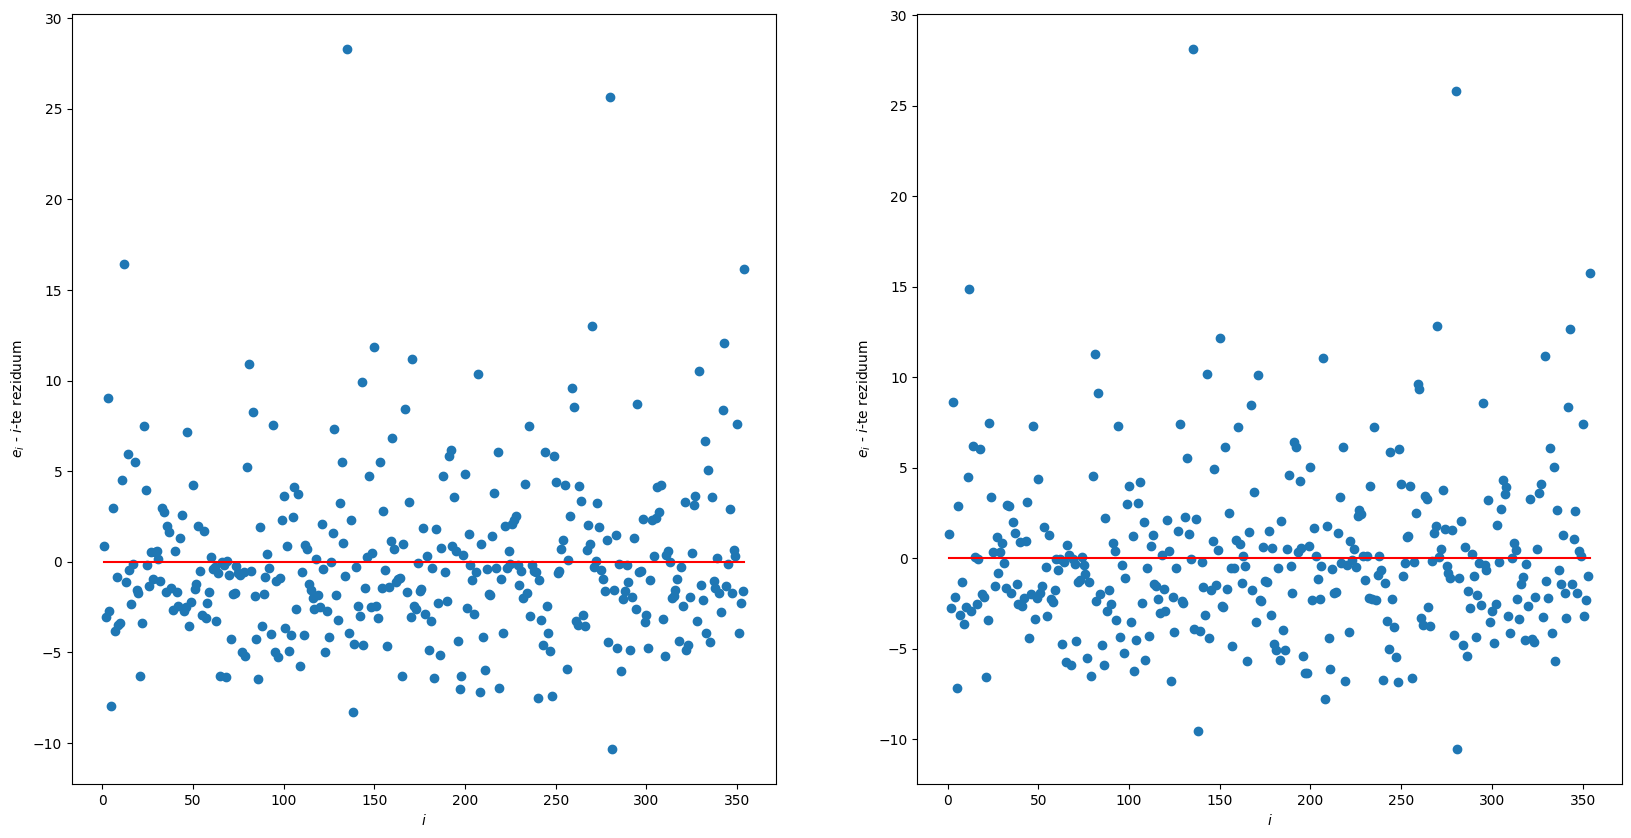

In [31]:
#wykresy
#1. wykres rezyudów 
# (i,e_i)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
xrange = np.arange(1, len(fitted_model_full.resid) + 1)
plt.scatter(xrange, fitted_model_full.resid)
plt.xlabel("$i$")
plt.ylabel("$e_i$ - $i$-te reziduum")
X_plot = np.linspace(0, 6, 6)
plt.plot(xrange, np.repeat(0, len(xrange)), color='red')

plt.subplot(1, 2, 2)
xrange = np.arange(1, len(fitted_model2.resid) + 1)
plt.scatter(xrange, fitted_model2.resid)
plt.xlabel("$i$")
plt.ylabel("$e_i$ - $i$-te reziduum")
X_plot = np.linspace(0, 6, 6)
plt.plot(xrange, np.repeat(0, len(xrange)), color='red')
#mniej więcej wokół 0 w obydwu przypadkach

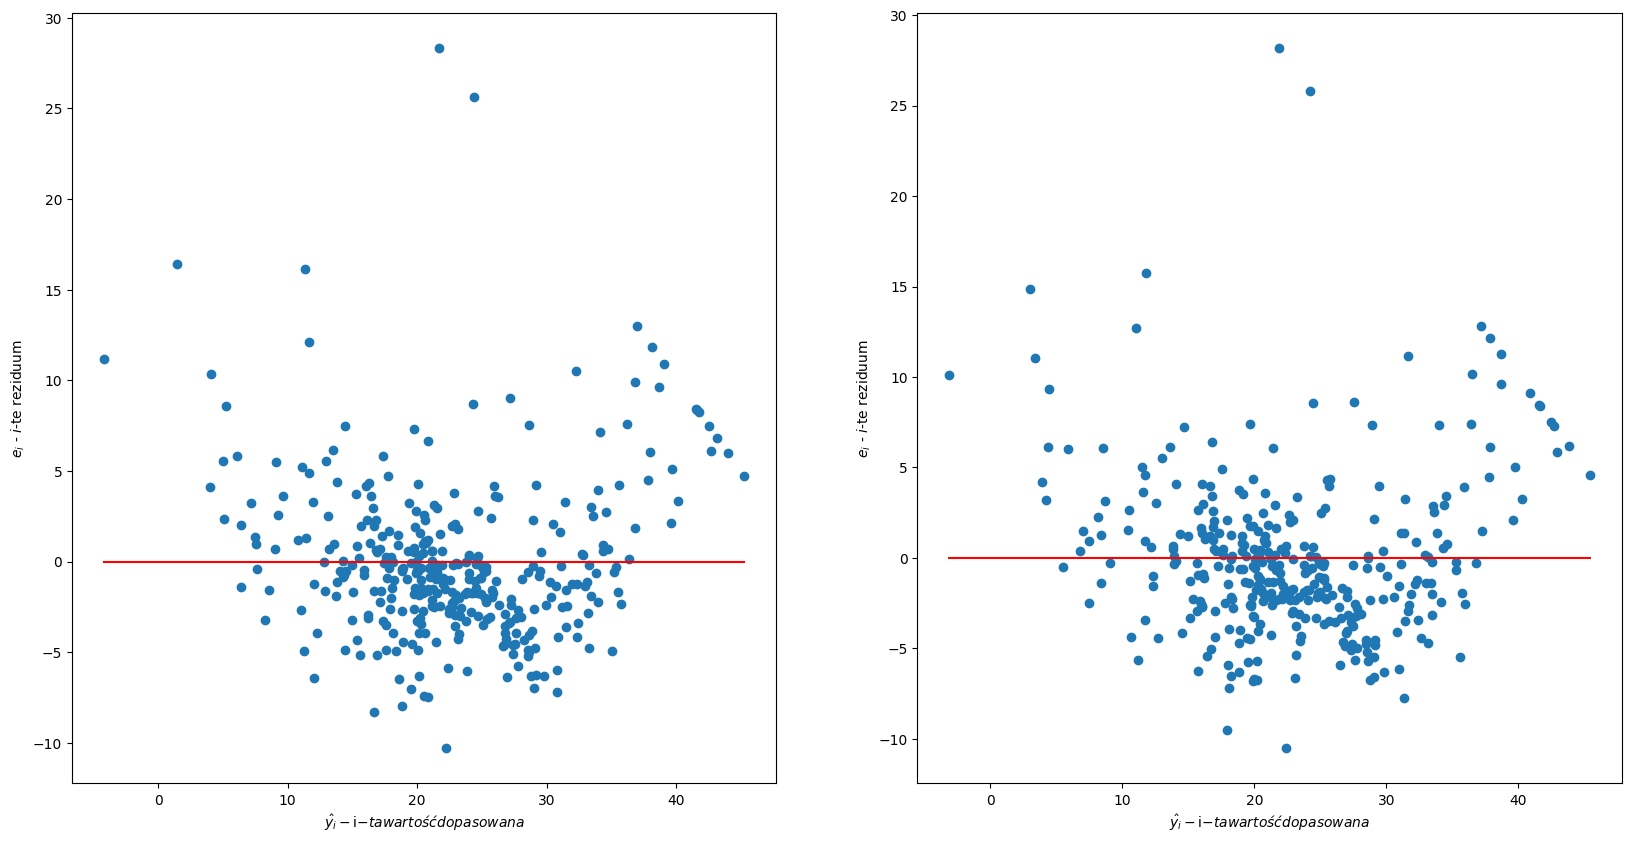

In [34]:
#2. wykres rezyudów 
# (\hat(y_i),e_i)


plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(fitted_model_full.fittedvalues, fitted_model_full.resid)
plt.xlabel("$\hat{y_i} - $i$-ta wartość dopasowana$")
plt.ylabel("$e_i$ - $i$-te reziduum")
xrange = np.arange(fitted_model_full.fittedvalues.min(), fitted_model_full.fittedvalues.max(), 0.1)
plt.plot(xrange, np.repeat(0, len(xrange)), color='red')

plt.subplot(1, 2, 2)
plt.scatter(fitted_model2.fittedvalues, fitted_model2.resid)
plt.xlabel("$\hat{y_i} - $i$-ta wartość dopasowana$")
plt.ylabel("$e_i$ - $i$-te reziduum")
xrange = np.arange(fitted_model2.fittedvalues.min(), fitted_model2.fittedvalues.max(), 0.1)
plt.plot(xrange, np.repeat(0, len(xrange)), color='red')
#mniej więcej wokół 0 w obydwu przypadkach, może będzie potrzebna regresja wielomianowa stopnia dwa, bo widać, że rezydua mogą się układać w łuk

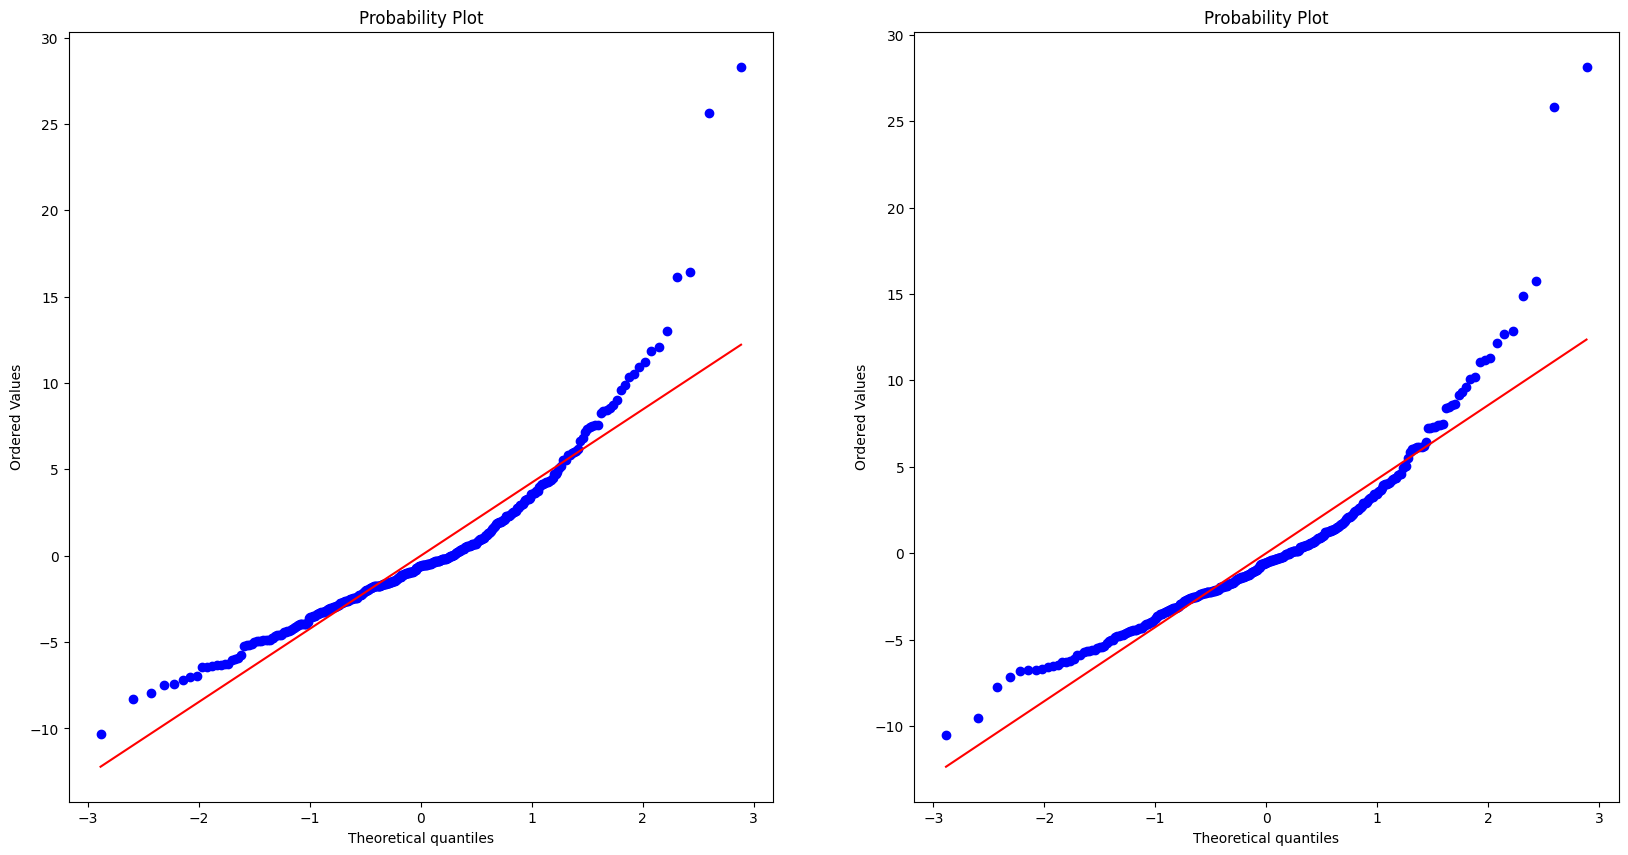

In [33]:
# 3. Wykres kwantylowy

import scipy as sp


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
_, (__, ___, r) = sp.stats.probplot(fitted_model_full.resid, plot=ax[0], fit=True)
_, (__, ___, r) = sp.stats.probplot(fitted_model2.resid, plot=ax[1], fit=True)
#nie ma normalności w obydwu przypadkach

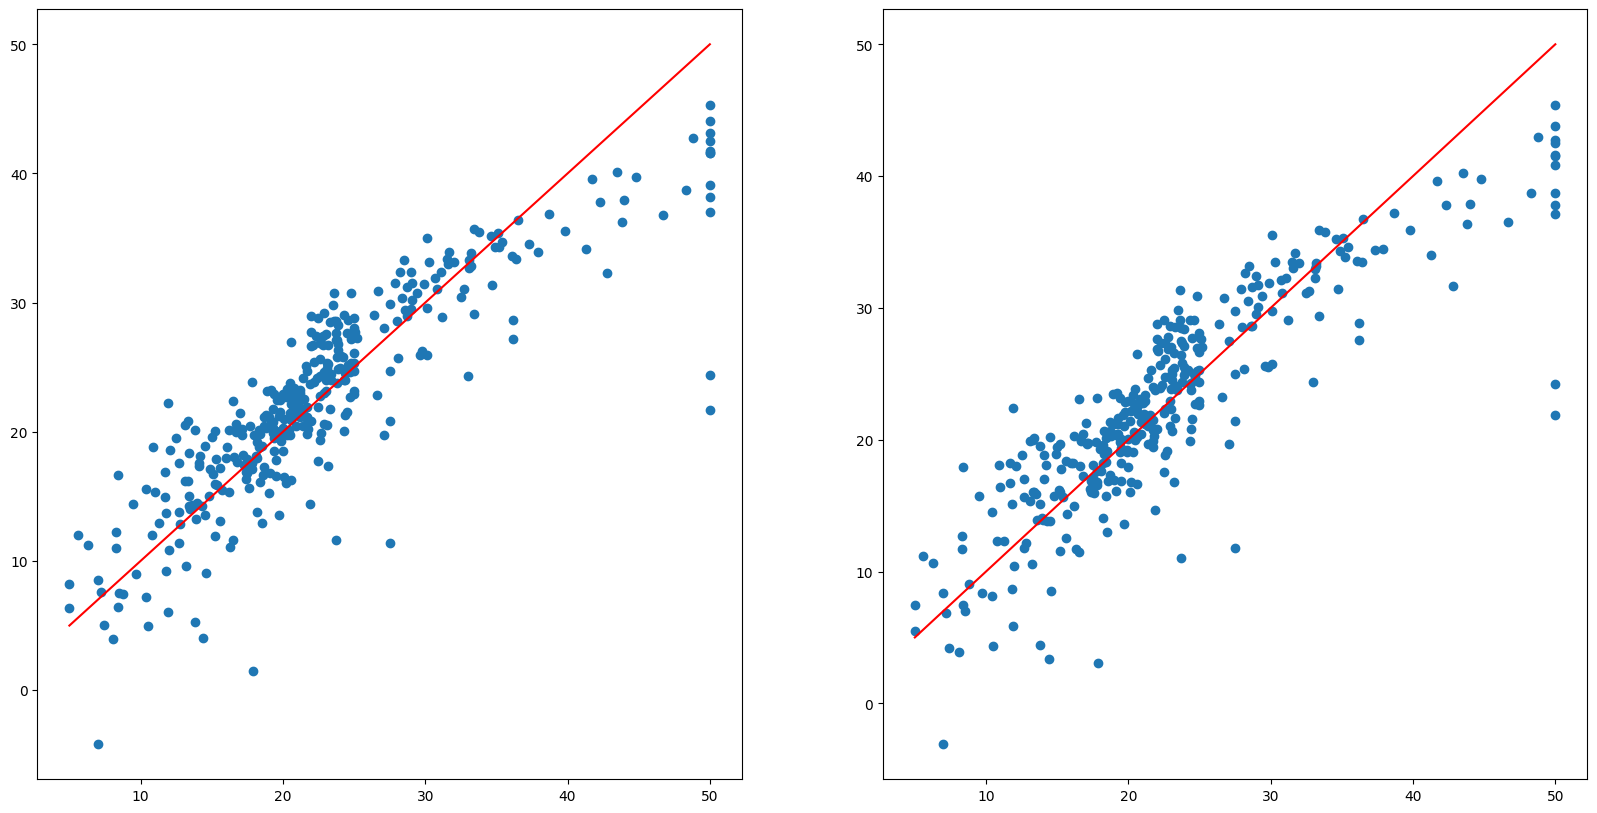

In [35]:
# 4. Wykres wartości przewidywanych względem prawdziwych: (y_i, \hat{y}_i)


plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
xrange = np.linspace(y_train.min(), y_train.max(), 100)

plt.scatter(y_train, fitted_model_full.fittedvalues)
plt.plot(xrange, xrange, color='red')

plt.subplot(1, 2, 2)
plt.scatter(y_train, fitted_model2.fittedvalues)
plt.plot(xrange, xrange, color='red')

#nie jest zbyt pięknie w obydwu przypadkach

In [36]:
#e porównanie miar jakości dopasowania i predykcji
results['lm(PRICE~.)'] = compute_metrics_statsmodels(fitted_model_full, y_train, X_test_with_const, y_test).values()
results['lm(PRICE~{})'.format("+".join(features1[1:]))] = compute_metrics_statsmodels(fitted_model2, y_train, X_test_with_const[features1], y_test).values()
results

#preferujemy jednak model pełny (chyba, że godzimy się na mały wzrost MAE i MSE na zb. testowym kosztem pozbycia się niektórych zmiennych)

,lm(PRICE~RM),lm(PRICE~.),lm(PRICE~CRIM+ZN+NOX+RM+DIS+RAD+TAX+PTRATIO+LSTAT)
r2,0.553877,0.764716,0.761188
mse_train,38.271529,20.184337,20.486924
mae_train,2.673882,2.317898,2.325480
mse_test,56.691637,28.405855,29.664653
mae_test,3.295596,2.709492,2.811749


#Regularyzacja

In [37]:
#Najpierw regresja grzbietowa
ridgecv = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=np.arange(0.01, 10, 0.01), scoring='neg_median_absolute_error', cv=10)
)
#warto zwrócić uwagę na funkcję RidgeCV, znajduje ridge w optymalną alphą z podanej siatki, wybór dokonany jest za pomocą kroswalidacji (bardzo podobne do gridsearcha)

In [38]:
#dopasowujemy do konkretnych danych
fitted_ridgecv = ridgecv.fit(X=X_train, y=y_train)
fitted_ridgecv

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,...
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
                         cv=10, scoring='neg_median_absolute_error'))])

In [39]:
fitted_ridgecv['ridgecv'].alpha_ #wybrana alpha

3.5999999999999996

In [40]:
#ridge z najlepszą alphą
ridge = make_pipeline(
    StandardScaler(),
    Ridge(alpha=fitted_ridgecv['ridgecv'].alpha_)
)

fitted_ridge = ridge.fit(X_train, y_train)

In [41]:
#liczenie metryk, tylko teraz dla modeli ze scikita (wcześniej było dla modeli ze statmodels)
def compute_metrics_sklearn(model, x_train, y_train, x_test, y_test):
    # Jakość dopasowania
    r2 = model.score(x_train, y_train)
    fitted_values = model.predict(x_train)
    mse_train = metrics.mean_squared_error(y_train, fitted_values)
    mae_train = metrics.median_absolute_error(y_train, fitted_values)

    # Jakość predykcji
    y_pred = model.predict(x_test)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    mae_test = metrics.median_absolute_error(y_test, y_pred)
    
    return {
        'r2': r2, 'mse_train': mse_train, 'mae_train': mae_train, 'mse_test': mse_test, 'mae_test': mae_test
    }

In [42]:
results['Ridge(alpha={})'.format(np.round(fitted_ridgecv['ridgecv'].alpha_, 2))] = \
compute_metrics_sklearn(fitted_ridge, X_train, y_train, X_test, y_test).values()
results
#jest lekka poprawa na zb. testowym

,lm(PRICE~RM),lm(PRICE~.),lm(PRICE~CRIM+ZN+NOX+RM+DIS+RAD+TAX+PTRATIO+LSTAT),Ridge(alpha=3.6)
r2,0.553877,0.764716,0.761188,0.764490
mse_train,38.271529,20.184337,20.486924,20.203679
mae_train,2.673882,2.317898,2.325480,2.277689
mse_test,56.691637,28.405855,29.664653,28.472176
mae_test,3.295596,2.709492,2.811749,2.686797


In [45]:
#Lasso
#LassoCV ma w sobie tylko scoring w postaci R^2, tak więc użyjemy klasycznego podejścia
lasso_estimator = make_pipeline(
    StandardScaler(),
    Lasso(max_iter=10000)
)

lasso_gridCV = GridSearchCV(
    estimator=lasso_estimator, 
    param_grid={'lasso__alpha': np.arange(0.01, 10, 0.01)},
    scoring='neg_median_absolute_error', 
    cv=10
)

In [46]:
fitted_lassocv = lasso_gridCV.fit(X=X_train, y=y_train) #dopasowujemy do danych

In [47]:
fitted_lassocv.best_params_ #najlepsze parametry

{'lasso__alpha': 0.37}

In [48]:
fitted_lasso = fitted_lassocv.best_estimator_ #najlepszy estmator

In [49]:
results['Lasso(alpha={})'.format(np.round(fitted_lassocv.best_params_['lasso__alpha'], 2))] = \
compute_metrics_sklearn(fitted_lasso, X_train, y_train, X_test, y_test).values()
results
#Lasso działa gorzej

,lm(PRICE~RM),lm(PRICE~.),lm(PRICE~CRIM+ZN+NOX+RM+DIS+RAD+TAX+PTRATIO+LSTAT),Ridge(alpha=3.6),Lasso(alpha=0.37)
r2,0.553877,0.764716,0.761188,0.764490,0.734813
mse_train,38.271529,20.184337,20.486924,20.203679,22.749612
mae_train,2.673882,2.317898,2.325480,2.277689,2.370692
mse_test,56.691637,28.405855,29.664653,28.472176,33.716367
mae_test,3.295596,2.709492,2.811749,2.686797,2.934832


#Regresja wielomianowa

In [50]:
#regresja wielomianowa
estimator_degree = make_pipeline(
        PolynomialFeatures(),
        LinearRegression()
    )

grid = GridSearchCV(
    estimator=estimator_degree,
    param_grid={
        'polynomialfeatures__degree': np.arange(1, 5)},
    scoring = "neg_median_absolute_error",
    cv = 10)

grid.fit(X=X_train, y=y_train)
print(grid.best_params_) #najlepszy stopień wielomianu

{'polynomialfeatures__degree': 2}


In [51]:
results['Poly{}'.format(grid.best_params_['polynomialfeatures__degree'])] = \
compute_metrics_sklearn(grid.best_estimator_, X_train, y_train, X_test, y_test).values()
results
#mocno poprawiają nam się wyniki

,lm(PRICE~RM),lm(PRICE~.),lm(PRICE~CRIM+ZN+NOX+RM+DIS+RAD+TAX+PTRATIO+LSTAT),Ridge(alpha=3.6),Lasso(alpha=0.37),Poly2
r2,0.553877,0.764716,0.761188,0.764490,0.734813,0.932828
mse_train,38.271529,20.184337,20.486924,20.203679,22.749612,5.762505
mae_train,2.673882,2.317898,2.325480,2.277689,2.370692,1.439118
mse_test,56.691637,28.405855,29.664653,28.472176,33.716367,22.836233
mae_test,3.295596,2.709492,2.811749,2.686797,2.934832,2.322455


In [52]:
#regresja wielomianowa +ridge
estimator_degree_ridge = make_pipeline(
        PolynomialFeatures(),
        StandardScaler(),
        Ridge()
)

grid = GridSearchCV(
    estimator=estimator_degree_ridge,
    param_grid={
        'polynomialfeatures__degree': np.arange(1, 5),
        'ridge__alpha': np.arange(0.01, 10, 0.01) 
               },
    scoring = "neg_median_absolute_error",
    cv = 10)

grid.fit(X=X_train, y=y_train)
print(grid.best_params_) #najlepszy stopień wielomianu i najlepsza alpha

{'polynomialfeatures__degree': 3, 'ridge__alpha': 3.94}


In [53]:
results['Poly_Ridge{}(alpha={})'.format(grid.best_params_['polynomialfeatures__degree'],np.round(grid.best_params_['ridge__alpha'], 2))] = \
compute_metrics_sklearn(grid.best_estimator_, X_train, y_train, X_test, y_test).values()
results
#jeszcze lepiej na zb. testowym

,lm(PRICE~RM),lm(PRICE~.),lm(PRICE~CRIM+ZN+NOX+RM+DIS+RAD+TAX+PTRATIO+LSTAT),Ridge(alpha=3.6),Lasso(alpha=0.37),Poly2,Poly_Ridge3(alpha=3.94)
r2,0.553877,0.764716,0.761188,0.764490,0.734813,0.932828,0.938518
mse_train,38.271529,20.184337,20.486924,20.203679,22.749612,5.762505,5.274322
mae_train,2.673882,2.317898,2.325480,2.277689,2.370692,1.439118,1.140453
mse_test,56.691637,28.405855,29.664653,28.472176,33.716367,22.836233,15.754210
mae_test,3.295596,2.709492,2.811749,2.686797,2.934832,2.322455,1.550323


In [54]:
#regresja wielomianowa +lasso
estimator_degree_lasso = make_pipeline(
        PolynomialFeatures(),
        StandardScaler(),
        Lasso(max_iter=10000)
)

grid = GridSearchCV(
    estimator=estimator_degree_lasso,
    param_grid={
        'polynomialfeatures__degree': np.arange(1, 5),
        'lasso__alpha': np.arange(0.01, 10, 0.01) 
               },
    scoring = "neg_median_absolute_error",
    cv = 10)

grid.fit(X=X_train, y=y_train)
print(grid.best_params_) #najlepszy stopień wielomianu i najlepsza alpha

{'lasso__alpha': 0.01, 'polynomialfeatures__degree': 3}


In [55]:
results['Poly_Lasso{}(alpha={})'.format(grid.best_params_['polynomialfeatures__degree'],np.round(grid.best_params_['lasso__alpha'], 2))] = \
compute_metrics_sklearn(grid.best_estimator_, X_train, y_train, X_test, y_test).values()
results
#jeszcze lepiej na zb. testowym

,lm(PRICE~RM),lm(PRICE~.),lm(PRICE~CRIM+ZN+NOX+RM+DIS+RAD+TAX+PTRATIO+LSTAT),Ridge(alpha=3.6),Lasso(alpha=0.37),Poly2,Poly_Ridge3(alpha=3.94),Poly_Lasso3(alpha=0.01)
r2,0.553877,0.764716,0.761188,0.764490,0.734813,0.932828,0.938518,0.940235
mse_train,38.271529,20.184337,20.486924,20.203679,22.749612,5.762505,5.274322,5.127038
mae_train,2.673882,2.317898,2.325480,2.277689,2.370692,1.439118,1.140453,1.214420
mse_test,56.691637,28.405855,29.664653,28.472176,33.716367,22.836233,15.754210,15.118640
mae_test,3.295596,2.709492,2.811749,2.686797,2.934832,2.322455,1.550323,1.737036


### Wyniki
Poniższa tabelka przedstawia końcowe rezultaty. Widzimy, że najlepsze reultaty uzyskujemy dla regresji wielomianowej, zwłaszcza w połączeniu z regularyzacją.

In [ ]:
results

,lm(PRICE~RM),lm(PRICE~.),lm(PRICE~CRIM+ZN+NOX+RM+DIS+RAD+TAX+PTRATIO+LSTAT),Ridge(alpha=3.6),Lasso(alpha=0.37),Poly2,Poly_Ridge3(alpha=3.94),Poly_Lasso3(alpha=0.01)
r2,0.553877,0.764716,0.761188,0.764490,0.734813,0.932828,0.938518,0.940235
mse_train,38.271529,20.184337,20.486924,20.203679,22.749612,5.762505,5.274322,5.127038
mae_train,2.673882,2.317898,2.325480,2.277689,2.370692,1.439118,1.140453,1.214420
mse_test,56.691637,28.405855,29.664653,28.472176,33.716367,22.836233,15.754210,15.118640
mae_test,3.295596,2.709492,2.811749,2.686797,2.934832,2.322455,1.550323,1.737036
